# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [153]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
import scipy.stats as st
from random import sample

sns.set
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


In [68]:
mean = np.mean(df.temperature)
std = np.std(df.temperature)
var = np.var(df.temperature)
print('The mean of the Temperature is: ' + str(mean))
print('The standard division of the Temperature is: ' + str(std))
print('The variance of the Temperature is: ' + str(var))

The mean of the Temperature is: 98.24923076923075
The standard division of the Temperature is: 0.730357778905038
The variance of the Temperature is: 0.5334224852071003


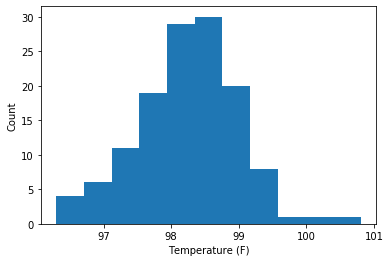

In [69]:
n_data = len(df.temperature)
n_bins = np.sqrt(n_data)
r_bins = int(n_bins)
plt.hist(df.temperature, bins=r_bins)
plt.xlabel('Temperature (F)')
plt.ylabel('Count')
plt.show()

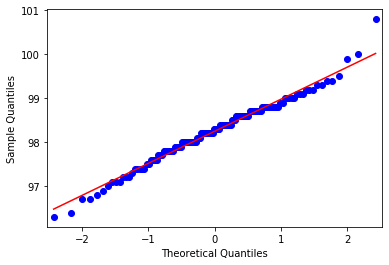

In [70]:
qqplot(df.temperature, line='s')
plt.show()

#### Ans 1: According to the question, we can use graphs to check if the data is normally distributed. I used both histogram and qq Quantile-Quantile Plot to show the data set is normally distributed.
1. According to histogram we can see the graph was shaped as a bell curve, that although is not strongly the familiar bell-shape, is a rough approximation.
2. According to the QQ-plot, we can conclude that the scatter plot of points in a diagonal line, closely fitting the expected diagonal pattern for a sample from a Gaussian distribution.

Thus the distribution of body temperatures is a normal distribution.

In [71]:
n = len(df.temperature)
print('The total number of temperature is: ' + str(n))
a = 0;
for index, value in enumerate(df.temperature):
    if df.temperature[index] == 98.6:
        a += 1
print('The body temperature equal to 98.6F is: ' + str(a))
p = a / n
print('The probability of sample mean equal to 98.6F is:' + str(p))

The total number of temperature is: 130
The body temperature equal to 98.6F is: 10
The probability of sample mean equal to 98.6F is:0.07692307692307693


In [72]:
print('Expected successes is: ' + str(n*p))
print('Expected failures is: ' + str(n*(1-p)))

Expected successes is: 10.0
Expected failures is: 120.0


#### Ans 2: The sample size n is reasonably large becauese the expected successes and failures are both at least 10. This can further say that the sampling distrubition is approximately normal.Also the observations are independent.

Since the 10% percent condition says that if we sample 10% percent or less of the population, we can treat individual observations as independent since removing each observation doesn't significantly change the population as we sample. The total population is obviously larger than 1300.

In [73]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

In [74]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

To do the hypothesis test, we assume:
H0: mean = 98.6
H1: mean != 98.6

Set significance level is 0.05

In [140]:
mean = np.mean(df.temperature)
translated_tem = df.temperature - mean + 98.6
diff_mean = 98.6 - mean
bs_replicates_t = draw_bs_reps(translated_tem, np.mean, 10000)
bs_replicates_o = draw_bs_reps(df.temperature, np.mean, 10000)
bs_replicates = bs_replicates_t - bs_replicates_o
# def diff(data):
#     return np.mean(data) - 98.6
# bs_replicates = draw_bs_reps(translated_tem, diff, 10000)
p_value = (np.sum(bs_replicates > diff_mean)) / 10000
print('The p-value is: ' + str(p_value))

The p-value is: 0.4974


Now using frequentist statistical testing to do this problem:

H0: mean = 98.6, H1: mean !=98.6, set the significance level is 0.05.

Here n = 130, sample mean = 98.25, sample standard deviation = 0.73.

In [151]:
z = (mean - 98.6)/(std/np.sqrt(130))
print('z-score is: ' + str(z))
print('p-value is: 0')

z-score is: -5.4759252020785585
p-value is: 0


In [152]:
t_value = (mean - 98.6)/(std/np.sqrt(130))
print('t-score is: ' + str(t_value))
print('p-value is: 0')

t-score is: -5.4759252020785585
p-value is: 0


Thus we can reject H0 by p-value is smaller than significance level.

#### Ans 4: By using bootstrap hypothesis test, we got p-value is greater than 0.05, thus we failed to reject H0. According to frequentist statistical testing, cause the p-value is smaller than the significance level, so we reject H0 which means the mean body temperture is not 98.6. 
1. I used a one-sample test, because we need to compare the mean value between a sample and population. 
2. I used z-test because the sample size is large enough.
3. If switch to t-test, the result is the same because the sample size is large enough.

The standard error of mean is: 0.06405661469519337
The standard deviation of bootstrap replicates is: 0.06404097145480975


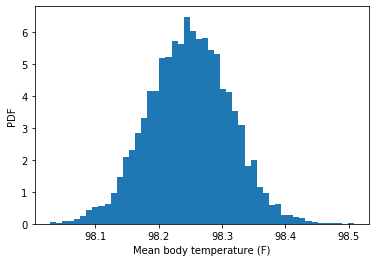

In [122]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(df.temperature, np.mean, size=10000)
# Compute and print SEM
sem = np.std(df.temperature) / np.sqrt(len(df.temperature))
print('The standard error of mean is: ' + str(sem))
# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print('The standard deviation of bootstrap replicates is: ' + str(bs_std))
# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('Mean body temperature (F)')
_ = plt.ylabel('PDF')
# Show the plot
plt.show()

In [90]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x,y

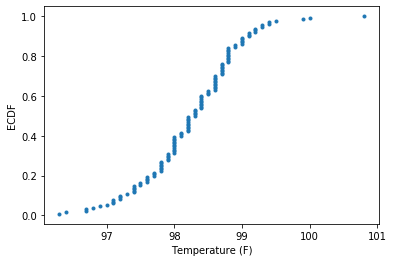

In [11]:
x, y = ecdf(df.temperature)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Temperature (F)')
_ = plt.ylabel('ECDF')
plt.show()